Training Data Shape: (50000, 32, 32, 3)
Test Data Shape: (10000, 32, 32, 3)


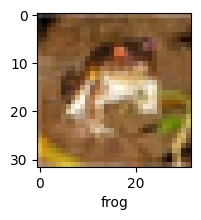

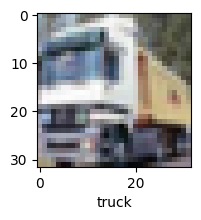

C:\Users\Jayesh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 768)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          76,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 88,010 (343.79 KB)

 Trainable params: 88,010 (343.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


C:\Users\Jayesh\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1017 - loss: 2.3024
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1100 - loss: 2.3021
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1143 - loss: 2.3021
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1063 - loss: 2.3019
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1086 - loss: 2.3018
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  
Classification Report:

              precision    recall  f1-score   support

    airplane       0.00      0.00      0.00      1000
  automobile       0.00      0.00      0.00      1000
        bird       0.00      0.00      0.00      1000
         cat       0.00      0.00      0.00      1000
        deer       0.00      0.00      0.00      1000
         dog       0.10      0.60      0.17      1000
        frog       0.00      0.00      0.00      1000
       horse       0.00      0.00      0.00      1000
        ship       0.

C:\Users\Jayesh\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jayesh\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jayesh\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Print dataset shapes
print("Training Data Shape:", X_train.shape)
print("Test Data Shape:", X_test.shape)

# Flatten label arrays
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

# Define class names
classes = ["airplane", "automobile", "bird", "cat", "deer", 
           "dog", "frog", "horse", "ship", "truck"]

# Function to plot a sample image
def plot_sample(X, y, index):
    plt.figure(figsize=(2,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    plt.show()

# Show some samples
plot_sample(X_train, y_train, 0)
plot_sample(X_train, y_train, 1)

# Resize images to a smaller size (16x16) to reduce memory load
X_train = tf.image.resize(X_train, (16, 16))
X_test = tf.image.resize(X_test, (16, 16))

# Normalize the pixel values to 0-1 and cast to float32
X_train = tf.cast(X_train, tf.float32) / 255.0
X_test = tf.cast(X_test, tf.float32) / 255.0

# Create a data generator to load data in batches
datagen = ImageDataGenerator(rescale=1./255)

# Generate data batches for training and testing
train_generator = datagen.flow(X_train, y_train, batch_size=32)
test_generator = datagen.flow(X_test, y_test, batch_size=32)

# Build the ANN model
ann = models.Sequential([
    layers.Flatten(input_shape=(16, 16, 3)),    # Flatten input
    layers.Dense(100, activation='relu'),       # Hidden layer 1
    layers.Dense(100, activation='relu'),       # Hidden layer 2
    layers.Dense(10, activation='softmax')      # Output layer (10 classes)
])

# Display model summary
ann.summary()

# Compile the model
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the model using the generator
ann.fit(train_generator, epochs=5)

# Predict on test data
y_pred_probs = ann.predict(test_generator, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=classes))
